# Normalisierung von Bildern
Dieses Jupyter Notebook befasst sich mit der Normalisierung von Bildern. Es werden die Gründe für verschiedene Möglichkeiten aufgezählt und diese anhand von Codebeispielen erläutert.

### Code - Imports
Im ersten Schritt werden hilfreiche Bibliotheken eingebunden. Dazu zählt **NumPy** für effiziente Matrizenberechnungen, der <a>MNIST</a>-Datensatz mit Beispielbildern aus **Keras** und **Matplotlib** zum Anzeigen der Bilder

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
%matplotlib inline

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\cnn\lib\site-packages\t

### Code - Laden des MNIST-Datensatzes
Von Keras wird der MNIST-Datensatz heruntergeladen. Dieser kommt in der Form eines Trainings- und eines Testdatensatzes, die jeweils aus zwei Arrays bestehen: die Bilder mit den zugehörigen Klassen (Zahlen).<br>
Dann wird ein Beispielbild angezeigt, um das Format der Bilder zu veranschaulichen.

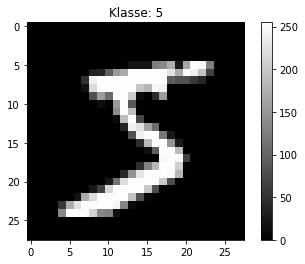

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()
idx = 0
im = x_train[idx]
plt.clf()
plt.imshow(im, cmap="gray")
plt.colorbar()
plt.title("Klasse: " + str(y_train[idx]))
plt.show()

### Code - Hilfsfunktion zum Anzeigen zweier Bilder nebeneinander
Die Funktion erhält das Original und das normalisierte Bild und zeigt beide nebeneinander an. Die Größe der Gesamt-Abbildung ist $10\times 3$ Zoll.

In [1]:
def showImages(orig, norm):
    plt.clf()
    fig, ax = plt.subplots(1,2,figsize=(10,3))
    original = ax[0].imshow(orig, cmap="gray")
    ax[0].set_title("Original")
    fig.colorbar(original, ax=ax[0])
    
    normImage = ax[1].imshow(norm, cmap="gray")
    fig.colorbar(normImage, ax=ax[1])
    ax[1].set_title("Neu")
    plt.show()

## Skalierung der Bilder
### Grund
<div style="width:70%;margin:auto">
<img src="assets/CNN.jpeg" alt="Aufbau eines CNNs"/>
<small style="text-align:right;display:block"><a href="https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53">Quelle</a></small>
    <div style="text-align:center;color:RGB(117,117,117)">Aufbau eines Convolutional Neural Networks</div>
</div>
Alle Bilder eines Datensatzes müssen das gleiche Format haben. Das kann man aus der Abbildung oben entnehmen. Da am Ende der Konvolution ein vollständig verbundenes neuronales Netzwerk steht, welches eine fixe Anzahl an Knoten besitzt, müssen die als Input verwendeten Bilder ebenfalls eine fixe, durch das Gesamt-Netzwerk bestimmte Größe besitzen. Zwar sorgen die Konvolutions-Schichten dafür, dass die Pixelanzahl abnimmt, dieser Faktor ist aber konstant, d. h. es gibt keine Toleranz bei den Dimensionen der Bilder.

### Code - Skalieren von Bildern
Die Funktion unten nimmt die neue Breite und Höhe des Bildes als Parameter und gibt das oben beim Laden des Datensatzes angezeigte Bild auf die neuen Dimensionen skaliert zurück.<br>
Hierfür wird zuerst ein NumPy-Array mit den neuen Dimensionen erstellt und dann für jeden Pixel in diesem Bild der Wert in dem Originalbild berechnet. Die Berechnungsfunktion ist simpel gehalten, wenn eine Kommazahl bei dem Lookup auf die Position des Pixels im Originalbild herauskommt, wird diese abgerundet auf den nächstniedrigeren Pixel.<br>
Die Funktion wird auf das Beispielbild von oben angewendet und das Original wird zusammen mit dem auf die Größe $100\times 300$ skalierten Bild ausgegeben.

<Figure size 432x288 with 0 Axes>

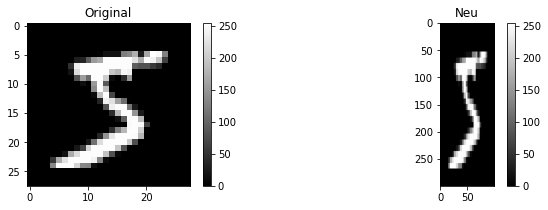

In [12]:
def scaleDimensions(xNew, yNew):
    new = np.zeros((yNew, xNew))
    factorX = float(xNew) / float(im.shape[0])
    factorY = float(yNew) / float(im.shape[1])
    for x in range(xNew):
        for y in range(yNew):
            new[y][x] = im[int(y/factorY)][int(x/factorX)]
    return new

new = scaleDimensions(100, 300)
showImages(im, new)

## Skalierung der Pixelwerte
### Grund
Bei dieser Form der Skalierung werden alle Pixelwerte auf den Bereich $[0;1]$ (bzw. $[-1;1]$) eingeschränkt. Das bedeutet einerseits, dass das CNN Bilder mit beliebig vielen Abstufungen einer Farbe verarbeiten kann. Mit Farbabstufungen ist hier die Größe eines Farbkanals gemeint, auch Bittiefe genannt (Alltagskameras speichern 8 Bit pro Farbe, d. h. Werte von $0$ bis $255$, während wissenschaftliche Kameras eine Bittiefe von 16 Bit haben, also $65536$ verschiedene Nuancen pro Farbkanal unterscheiden). Neuronale Netze und deren Komponenten sind jedoch oft dafür optimiert, dass sie mit Parametern in dem Größenbereich $1$ schneller zu einer Lösung konvergieren. Die Skalierung sorgt also für eine kürzere Trainingszeit des Netzwerks.
### Das Verfahren
#### Skalierung auf $[0;1]$
Die Skalierung auf $[0;1]$ erfolgt trivial durch die Division jedes Pixels durch den maximalen Pixelwert. Die Formel dafür lautet $$x_{norm}=\frac{x}{2^b-1}$$ mit $b$ als Bittiefe. Anders ausgedrückt wird z. B. bei 8 Bit pro Farbkanal (Division durch $2^8-1=255$) der Pixel mit dem Wert RGB(0, 128, 255) zu dem Wert RGB(0, 0.5, 1).<br>

### Code - Skalierung auf das Intervall $[0;1]$
Die folgende Funktion nimmt ein Bild und die Bittiefe des Bilds und skaliert die Pixelwerte des Bilds auf das Intervall $[0;1]$.<br>
Dann wird wie oben auch das Originalbild und das normalisierte Bild angezeigt.

<Figure size 432x288 with 0 Axes>

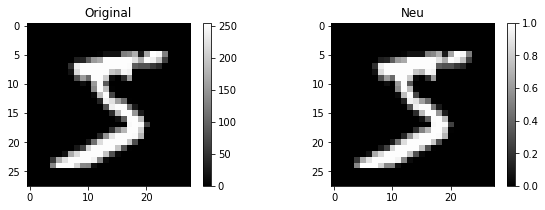

In [10]:
def scaleBetween0And1(x, b):
    return x / (2**b - 1)

showImages(im, scaleBetween0And1(im, 8))

#### Skalierung auf $[-1;1]$
Um alle Pixelwerte auf den Bereich $[-1;1]$ zu skalieren, wird die Formel $$x_{norm}=\frac{x-m}{x_{max}-x_{min}}$$ mit dem arithmetischen Mittel (mean) $m$ und dem höchsten bzw. niedrigsten Wert des Bildes $x_{max}$ bzw. $x_{min}$ auf jedes Bild einzeln angewandt. Alternative Implementierungen nutzen sogenannte "Batches", d.h. eine Gruppe von Bildern, die zur Berechnung des means, des Maximums und des Minimums hergenommen werden.<br>

### Code - Skalierung auf $[-1;1]$
Die Funktion unten setzt die gerade genannte Formel zur Skalierung eines Bildes auf das Intervall $[-1;1]$ um.<br>
Es werden wieder das Originalbild und das normalisierte Bild ausgegeben.

<Figure size 432x288 with 0 Axes>

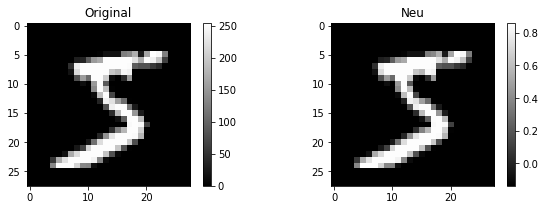

In [13]:
def scaleBetweenMinus1And1(x):
    mean = np.mean(x)
    maxVal = np.max(x)
    minVal = np.min(x)
    return (x - mean)/(maxVal - minVal)

showImages(im, scaleBetweenMinus1And1(im))

Eine weitere, oft genutzte Formel ist $$x_{norm}=\frac{x-m}{s}$$ wieder mit dem mean $m$, dazu die Standardabweichung $s$. In diesem Fall wird die Verteilung der Pixel auf eine Normalverteilung abgebildet. Das führt wie schon oben dazu, dass das CNN kürzer trainiert werden muss. Grund dafür ist, dass neuronale Netze so ausgelegt sind, dass sie bei einer Normalverteilung der Features, d. h. der Inputwerte &ndash; in unserem Fall Pixelwerte &ndash; möglichst schnell konvergieren.
<div class="alert alert-warning">Bei dieser Skalierung liegen ca. 68% der Werte im Intervall $[-1;1]$ (vgl. <a href="https://de.wikipedia.org/w/index.php?title=Normalverteilung&oldid=205154928">Wikipedia</a>). Dennoch besitzen alle Werte &ndash; ausgenommen Ausreißer &ndash; die Größenordnung $1$, was für ein neuronales Netz vollständig ausreichend ist. Zusammen mit dem Fakt, dass die Eingabewerte nach der Umformung normalverteilt sind (Mean: $0$, Standardabweichung: $1$), sorgt dies für eine Verkürzung der Trainingsdauer.</div>

### Code - Skalierung auf Mean $0$, Standardabweichung $1$
Die nächste Funktion setzt die im vorherigen Abschnitt gezeigte Funktion zur Skalierung der Pixelwerte auf eine Normalverteilung mit Mean $0$ und Standardabweichung $1$ um.<br>
Es wird wieder das Bild vor und nach der Transformation ausgegeben.<br>
Unter den Bildern steht jeweils der Mean und die Standardabweichung. Der Anteil im Intervall $[-1;1]$ ist nicht $68\%$, weil die MNIST-Bilder fast ausschließlich aus schwarzen und weißen Pixeln bestehen. Für andere Bilder ist dieser Anteil näher am theoretischen Wert.

<Figure size 432x288 with 0 Axes>

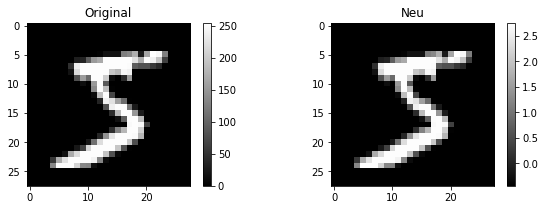

Original Mean: 35.108418367346935, Normalisiert Mean: 7.250436079184695e-17
Original Standardabweichung: 79.64882892760731, Normalisiert Standardabweichung: 1.0
Anteil zwischen -1 und 1: 0.85


In [14]:
def scaleMean0StdDev1(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean)/std

norm = scaleMean0StdDev1(im)
showImages(im, norm)

print(f"Original Mean: {np.mean(im)}, Normalisiert Mean: {np.mean(norm)}")
print(f"Original Standardabweichung: {np.std(im)}, Normalisiert Standardabweichung: {np.std(norm)}")
print("Anteil zwischen -1 und 1: %.2f" % (((-1 < norm) & (norm < 1)).sum()/norm.size))

# Quellen
http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/Digital_Image_Processing_3rdEd_truncated.pdf<br>
http://www.dataminingblog.com/standardization-vs-normalization/<br>
https://mathworld.wolfram.com/VectorNorm.html